In [4]:
import torchvision
import torch.nn as nn
import torch.nn.functional as nnf
import torch
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms.functional import to_tensor, normalize
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torchvision import transforms, models
from torchvision.datasets import Food101
from torchvision.models import ResNet50_Weights
import os
import shutil
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
print(torch.cuda.get_device_name(0))

def test_acc(net: nn.Module, test_loader: DataLoader):

	net.to(device)
	net.eval()
	
	total = 0
	correct = 0

	for images, labels in test_loader:
		images, labels = images.to(device), labels.to(device)
		total += labels.size(0)

		outputs = net(images)
		_, predicted = torch.max(outputs, 1)
		correct += (predicted == labels).sum().item()

	return correct / total * 100

def train_fn(epochs: int, train_loader: DataLoader, test_loader: DataLoader,
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer, train_dataset_length):

	losses = []
	accuracies = []

	net.to(device)

	for e in range(epochs):
		net.train()
		running_loss = 0.0

		for images, labels in train_loader:
			images, labels = images.to(device), labels.type(torch.LongTensor).to(device)

			optimizer.zero_grad()
			outputs = net(images)
			loss = loss_fn(outputs, labels)
			loss.backward()
			optimizer.step()

			running_loss += loss.item() * images.size(0)

		epoch_loss = running_loss / train_dataset_length

		print(f"Loss-ul la finalul epocii {e + 1}: {epoch_loss}")

		acc = test_acc(net, test_loader)
		print(f"Acuratetea la finalul epocii {e + 1} este {acc:.2f}%")

		losses.append(epoch_loss)
		accuracies.append(acc)

	loss_graph(losses)
	accuracy_graph(accuracies)

def loss_graph(losses):
    plt.plot(losses)

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

def accuracy_graph(accuracies):
    plt.plot(accuracies)

    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 101)
        )

    def forward(self, x):
        return self.model(x)

cuda
NVIDIA GeForce RTX 4060 Laptop GPU


In [5]:
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

Training started
Loss-ul la finalul epocii 1: 3.0075960619457485
Acuratetea la finalul epocii 1 este 44.00%
Loss-ul la finalul epocii 2: 2.1097749090509446
Acuratetea la finalul epocii 2 este 47.88%
Loss-ul la finalul epocii 3: 1.8891472841017316
Acuratetea la finalul epocii 3 este 50.73%
Loss-ul la finalul epocii 4: 1.7862120041988865
Acuratetea la finalul epocii 4 este 51.13%
Loss-ul la finalul epocii 5: 1.6775364149836425
Acuratetea la finalul epocii 5 este 53.43%
Loss-ul la finalul epocii 6: 1.610557624640638
Acuratetea la finalul epocii 6 este 53.64%
Loss-ul la finalul epocii 7: 1.5524794638196233
Acuratetea la finalul epocii 7 este 52.89%
Loss-ul la finalul epocii 8: 1.508592645563308
Acuratetea la finalul epocii 8 este 53.03%
Loss-ul la finalul epocii 9: 1.4693760392374724
Acuratetea la finalul epocii 9 este 54.51%
Loss-ul la finalul epocii 10: 1.425340820727962
Acuratetea la finalul epocii 10 este 54.99%


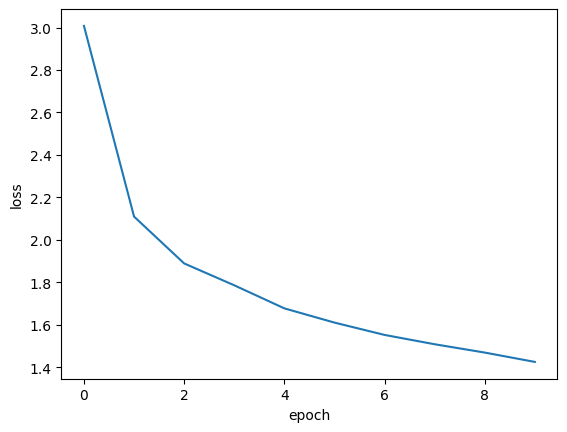

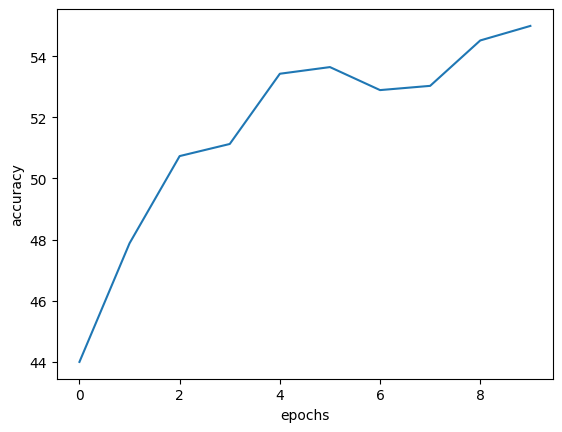

Duration of training: 45.77433421214422


In [6]:
train_dir = "data/train"
val_dir = "data/test"

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(val_dir, transform=transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 2.9817234084315034
Acuratetea la finalul epocii 1 este 44.36%
Loss-ul la finalul epocii 2: 2.104680647094651
Acuratetea la finalul epocii 2 este 48.77%
Loss-ul la finalul epocii 3: 1.8966106820499937
Acuratetea la finalul epocii 3 este 50.57%
Loss-ul la finalul epocii 4: 1.783157017616549
Acuratetea la finalul epocii 4 este 53.76%
Loss-ul la finalul epocii 5: 1.6994275041460598
Acuratetea la finalul epocii 5 este 53.43%
Loss-ul la finalul epocii 6: 1.6363433265056546
Acuratetea la finalul epocii 6 este 54.32%
Loss-ul la finalul epocii 7: 1.5587410420395753
Acuratetea la finalul epocii 7 este 54.99%
Loss-ul la finalul epocii 8: 1.5318134647312731
Acuratetea la finalul epocii 8 este 53.50%
Loss-ul la finalul epocii 9: 1.5123202607655288
Acuratetea la finalul epocii 9 este 54.40%
Loss-ul la finalul epocii 10: 1.4660075460094038
Acuratetea la finalul epocii 10 este 55.09%


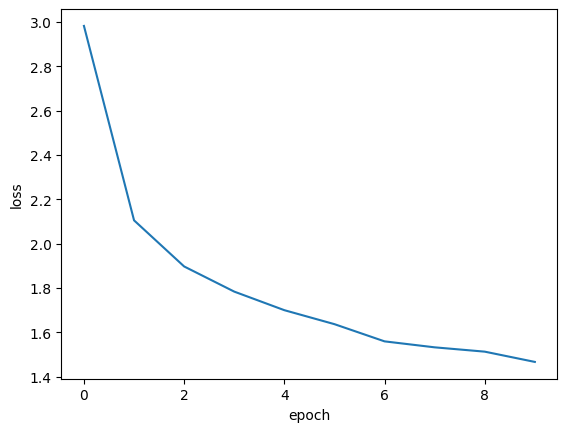

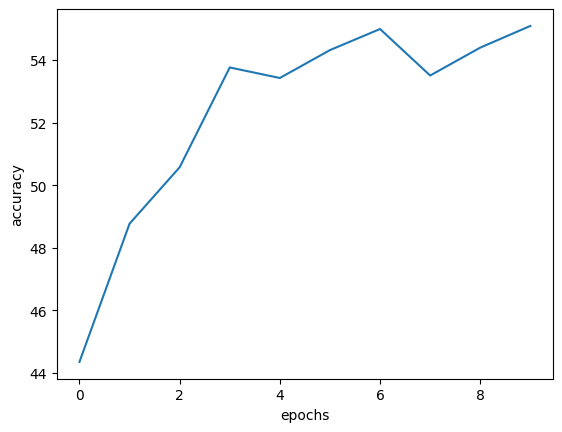

Duration of training: 45.95122361977895


In [7]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dir = "data/train"
val_dir = "data/test"

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(val_dir, transform=transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')